# APSC 258 Project 1 (Mar 2 - 5, 2021)
***
Due: 11:59PM, March 12, 2021

Files to submit:
1. .ipynb
2. a .pdf of your .ipynb

### Student Name: Aashish Chilwal
### Student Number: 86923679
### Lab Section: L1 D

# Simple Linear Regression

#### At the very begining of the project, the following video is highly recommended to watch for a good understading of simple linear regression.
https://www.youtube.com/watch?v=zPG4NjIkCjc

In this project, we'll explore how to create a very simple fit line, the classic case of $y=mx+b$. We'll go carefully through each step, so you can see what type of question a simple fit line can answer. Keep in mind, this project is very simplified and is not the approach we'll take in practice, its just here to get you thinking about linear regression in perhaps the same way [Galton](https://en.wikipedia.org/wiki/Francis_Galton) did.

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sample Data

This sample data displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [13]:
df = pd.read_csv("Advertising.csv")

In [14]:
# check out the fisrt 5 rows of data
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [15]:
# prints information about a DataFrame 
# including the index dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Question 1 (5 marks): 

**Is there a relationship between *total* advertising spend and *sales*?**

Hint: You can scatter plot the *total* advertising spend versus *sales* to show the data scattering pattern.


**Expected output**: a scattter plot of the *total* advertising spend versus *sales*.

Text(0, 0.5, 'Sales')

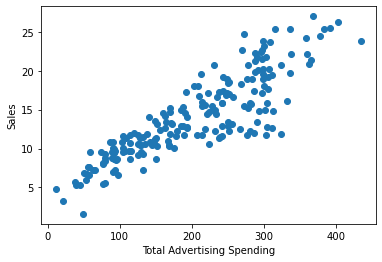

In [16]:
# code here
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
plt.scatter(df['total_spend'],df["sales"],)
plt.xlabel("Total Advertising Spending")
plt.ylabel("Sales")

## Least Squares Line

Full formulas available on Wikipedia: https://en.wikipedia.org/wiki/Linear_regression, as well as in lecture notes.

**Understanding what a line of best fit answers.**
If someone was to spend a total of $200 , what would the expected sales be? We now simplify this project a bit by combining all the features into "total spend" such that we can focus on understanding what a linear regression line can help answer.

**Think about this question:** 
Our next ad campaign will have a total spend of $200, how many units do we expect to sell as a result of this?

**Basically, we want to figure out how to create the following line :**

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

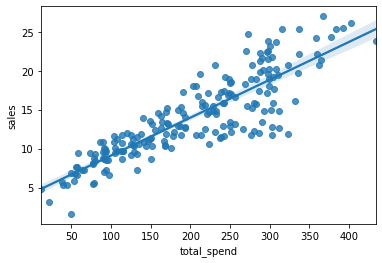

In [17]:
# Basically, we want to figure out how to create this line
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
sns.regplot(x='total_spend',y='sales',data=df)

Let's go ahead and start solving: $$y=mx+b$$

Simply solve for $m$ and $b$, remember we are solving in a generalized form:

$$ \hat{y} = \beta_0 + \beta_1X$$

Capitalized to signal that we are dealing with a matrix of values, we have a known matrix of labels (sales numbers) $Y$ and a known matrix of total_spend ($X$). We are going to solve for the **$\mathbf \beta_0, \beta_1...$** coefficients, which as we expand to more than just a single feature, will be important to build an understanding of what features have the most predictive power. We use $\hat y$ to indicate that $\hat y$ hat is a prediction or estimation, $y$ would be a true label/known value.


### Question 2 (10 marks): 
**Can you create the linear regression line as the line shown in the previous plot?**

Hint for question 2: You can use *NumPy* for this (if you really wanted to, you could solve this [from scratch](https://towardsdatascience.com/linear-regression-by-hand-ee7fe5a751bf))

**Expected output**: A plot of the created linear regression line. (It'd better to obain the values of coefficients $\beta_0$ and $\beta_1$, because you will use them for prediction in Question 3.)

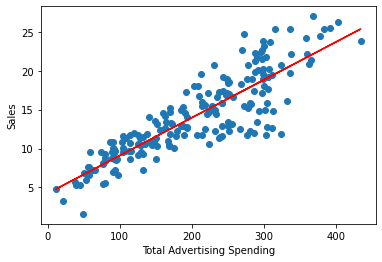

In [28]:
# code here
m,b = np.polyfit(df['total_spend'],df['sales'],1)
y = m*x + b
x = df["total_spend"]
plt.scatter(x,df["sales"],)
plt.xlabel('Total Advertising Spending')
plt.ylabel('Sales')
plt.plot(x,y,color='red')

### Question 3 (5 marks):

**Our next ad campaign will have a total spend of $200, how many units do we expect to sell as a result of this?**

**Expected output**: Print out the predicted sale value.

# code here
Totalspend = 200
expectedsales = (m*Totalspend)+b
print(f'The predicted sales value is {expectedsales:.2f} .')

### Further considerations...which we will explore in much more depth! (For bonus question in the end)

## Overfitting, Underfitting, and Measuring Performance

Notice we fit to *order=1*, essentially a straight line, we can begin to explore higher orders, but does higher order mean an overall better fit? Is it possible to fit too much? Too little? How would we know and how do we even define a good fit?

In [9]:
X = df['total_spend']
y = df['sales']
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [10]:
# help(np.polyfit)

In [26]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,100)

In [27]:
predicted_sales = 3.07615033e-07*potential_spend**3 \
                + -1.89392449e-04*potential_spend**2 \
                + 8.20886302e-02*potential_spend**1 \
                + 2.70495053e+00

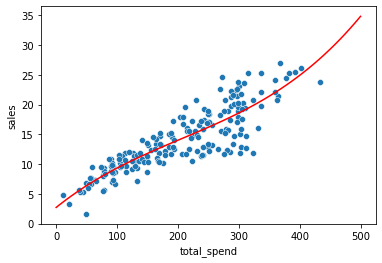

In [13]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

**We have a high level polynomial model and just a simple linear fit model and we want to be able to compare them.**
### Bonus Question (2 marks):
**Is this better than our straight line fit? What are good ways of measuring this?**

**Expected output**: Your own answers of the questions.

Put your answers here: